In [4]:
import numpy as np
import pandas as pd
import warnings #ignore warnings
warnings.filterwarnings('ignore')

In [5]:
red_wine_data = pd.read_csv('winequality-red.csv', sep=',')

In [6]:
#Let's take a look at  our data.
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#Finding the total number of rows and columns
red_wine_data.shape

(1599, 12)

In [8]:
#Getting a statistical overview of data using describe function
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#Exploring the features of variables
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

From the above variables, quality variable is our target variable and rest all are input/predictor variables. With the help of all these variables, we will predict the value of quality variable.

In [10]:
#Getting the unique values for our quality variables
red_wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [11]:
red_wine_data['quality'].nunique()

6

In [12]:
#Counting the frequency of each value of variable quality
red_wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [13]:
#Renaming the columns
red_wine_data.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
                              'free sulphur dioxide':'free_sulphur_dioxide', 'total sulphur dioxide':'total_sulphur_dioxide'})

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Now, we will check for a missing values

In [14]:
#df.isna() returns the dataframe with boolean values indicating missing values.
#df.notna() is just opposite of df.isna()
red_wine_data.isna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
#df.isna().sum() returns the number of missing values in each columns 
red_wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

From the above output we can see that there are no missing values in any column.

In [16]:
#df.info( returns information about the datatypes of each columns, no of null values in each column, etc
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
#Checking for the duplicates using duplicated() function.
duplicate = red_wine_data[red_wine_data.duplicated()]
duplicate.shape

(240, 12)

Graphically representing the data to get better visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#Separating input and target variable into x and y respectively
x = red_wine_data.drop(red_wine_data['quality'], inplace=True)
y = red_wine_data['quality']

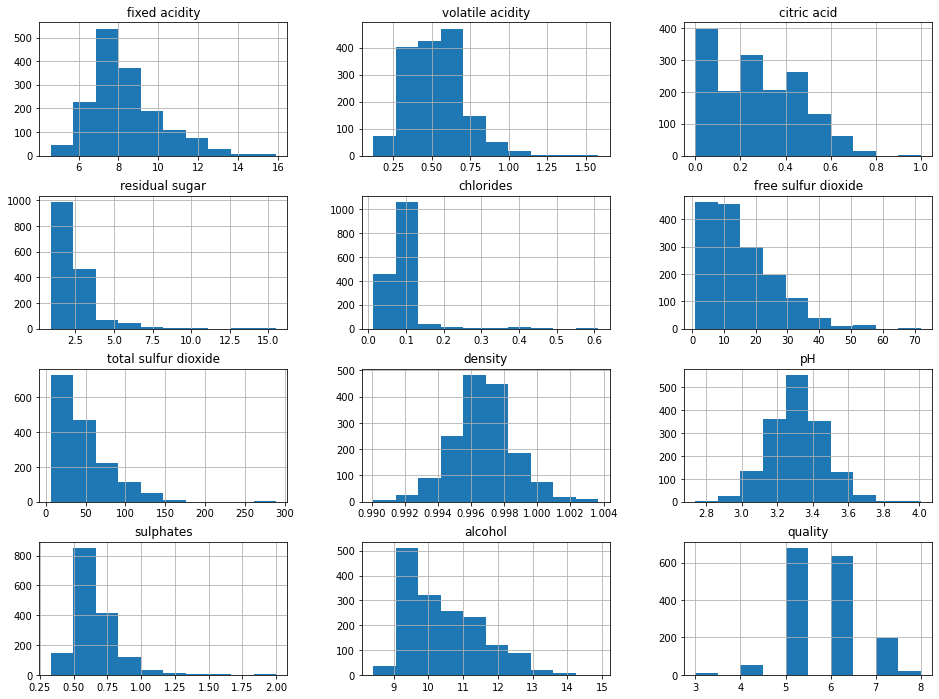

In [20]:
red_wine_data.hist(bins=10, figsize=(16,12))
plt.show()

In [21]:
#Let's check the co-relation
red_wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.254398,0.671410,0.114616,0.093650,-0.154536,-0.114387,0.668582,-0.682678,0.182851,-0.062303,0.124330
volatile acidity,-0.254398,1.000000,-0.551206,0.002691,0.061790,-0.009841,0.077683,0.022580,0.233098,-0.260545,-0.201714,-0.391616
citric acid,0.671410,-0.551206,1.000000,0.142135,0.203428,-0.062613,0.033668,0.365729,-0.540720,0.311429,0.107572,0.228214
residual sugar,0.114616,0.002691,0.142135,1.000000,0.054904,0.186785,0.202718,0.355577,-0.084971,0.003772,0.040552,0.014504
chlorides,0.093650,0.061790,0.203428,0.054904,1.000000,0.005293,0.047110,0.200734,-0.265023,0.370793,-0.222395,-0.128786
free sulfur dioxide,-0.154536,-0.009841,-0.062613,0.186785,0.005293,1.000000,0.667660,-0.021810,0.071316,0.051157,-0.070349,-0.050443
total sulfur dioxide,-0.114387,0.077683,0.033668,0.202718,0.047110,0.667660,1.000000,0.070902,-0.065474,0.042388,-0.206664,-0.184133
density,0.668582,0.022580,0.365729,0.355577,0.200734,-0.021810,0.070902,1.000000,-0.342598,0.148474,-0.496641,-0.174029
pH,-0.682678,0.233098,-0.540720,-0.084971,-0.265023,0.071316,-0.065474,-0.342598,1.000000,-0.196103,0.207645,-0.057320
sulphates,0.182851,-0.260545,0.311429,0.003772,0.370793,0.051157,0.042388,0.148474,-0.196103,1.000000,0.091686,0.253019


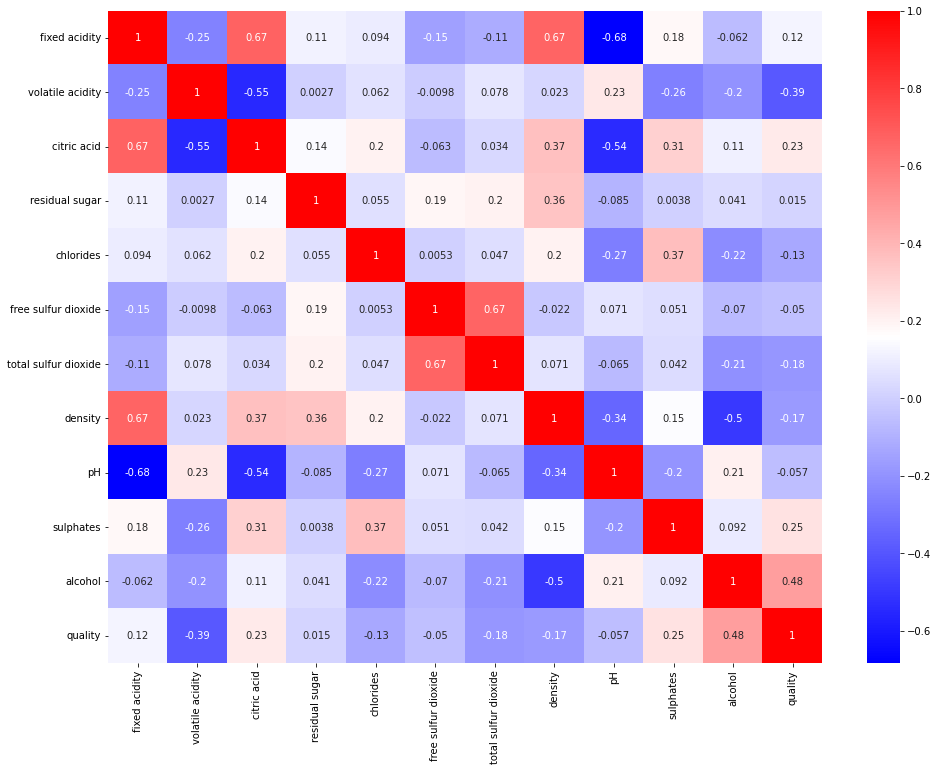

In [22]:
#Plotting the above co-relation matrix using heatmap
plt.figure(figsize=(16,12))
sns.heatmap(red_wine_data.corr(), cmap='bwr', annot=True)

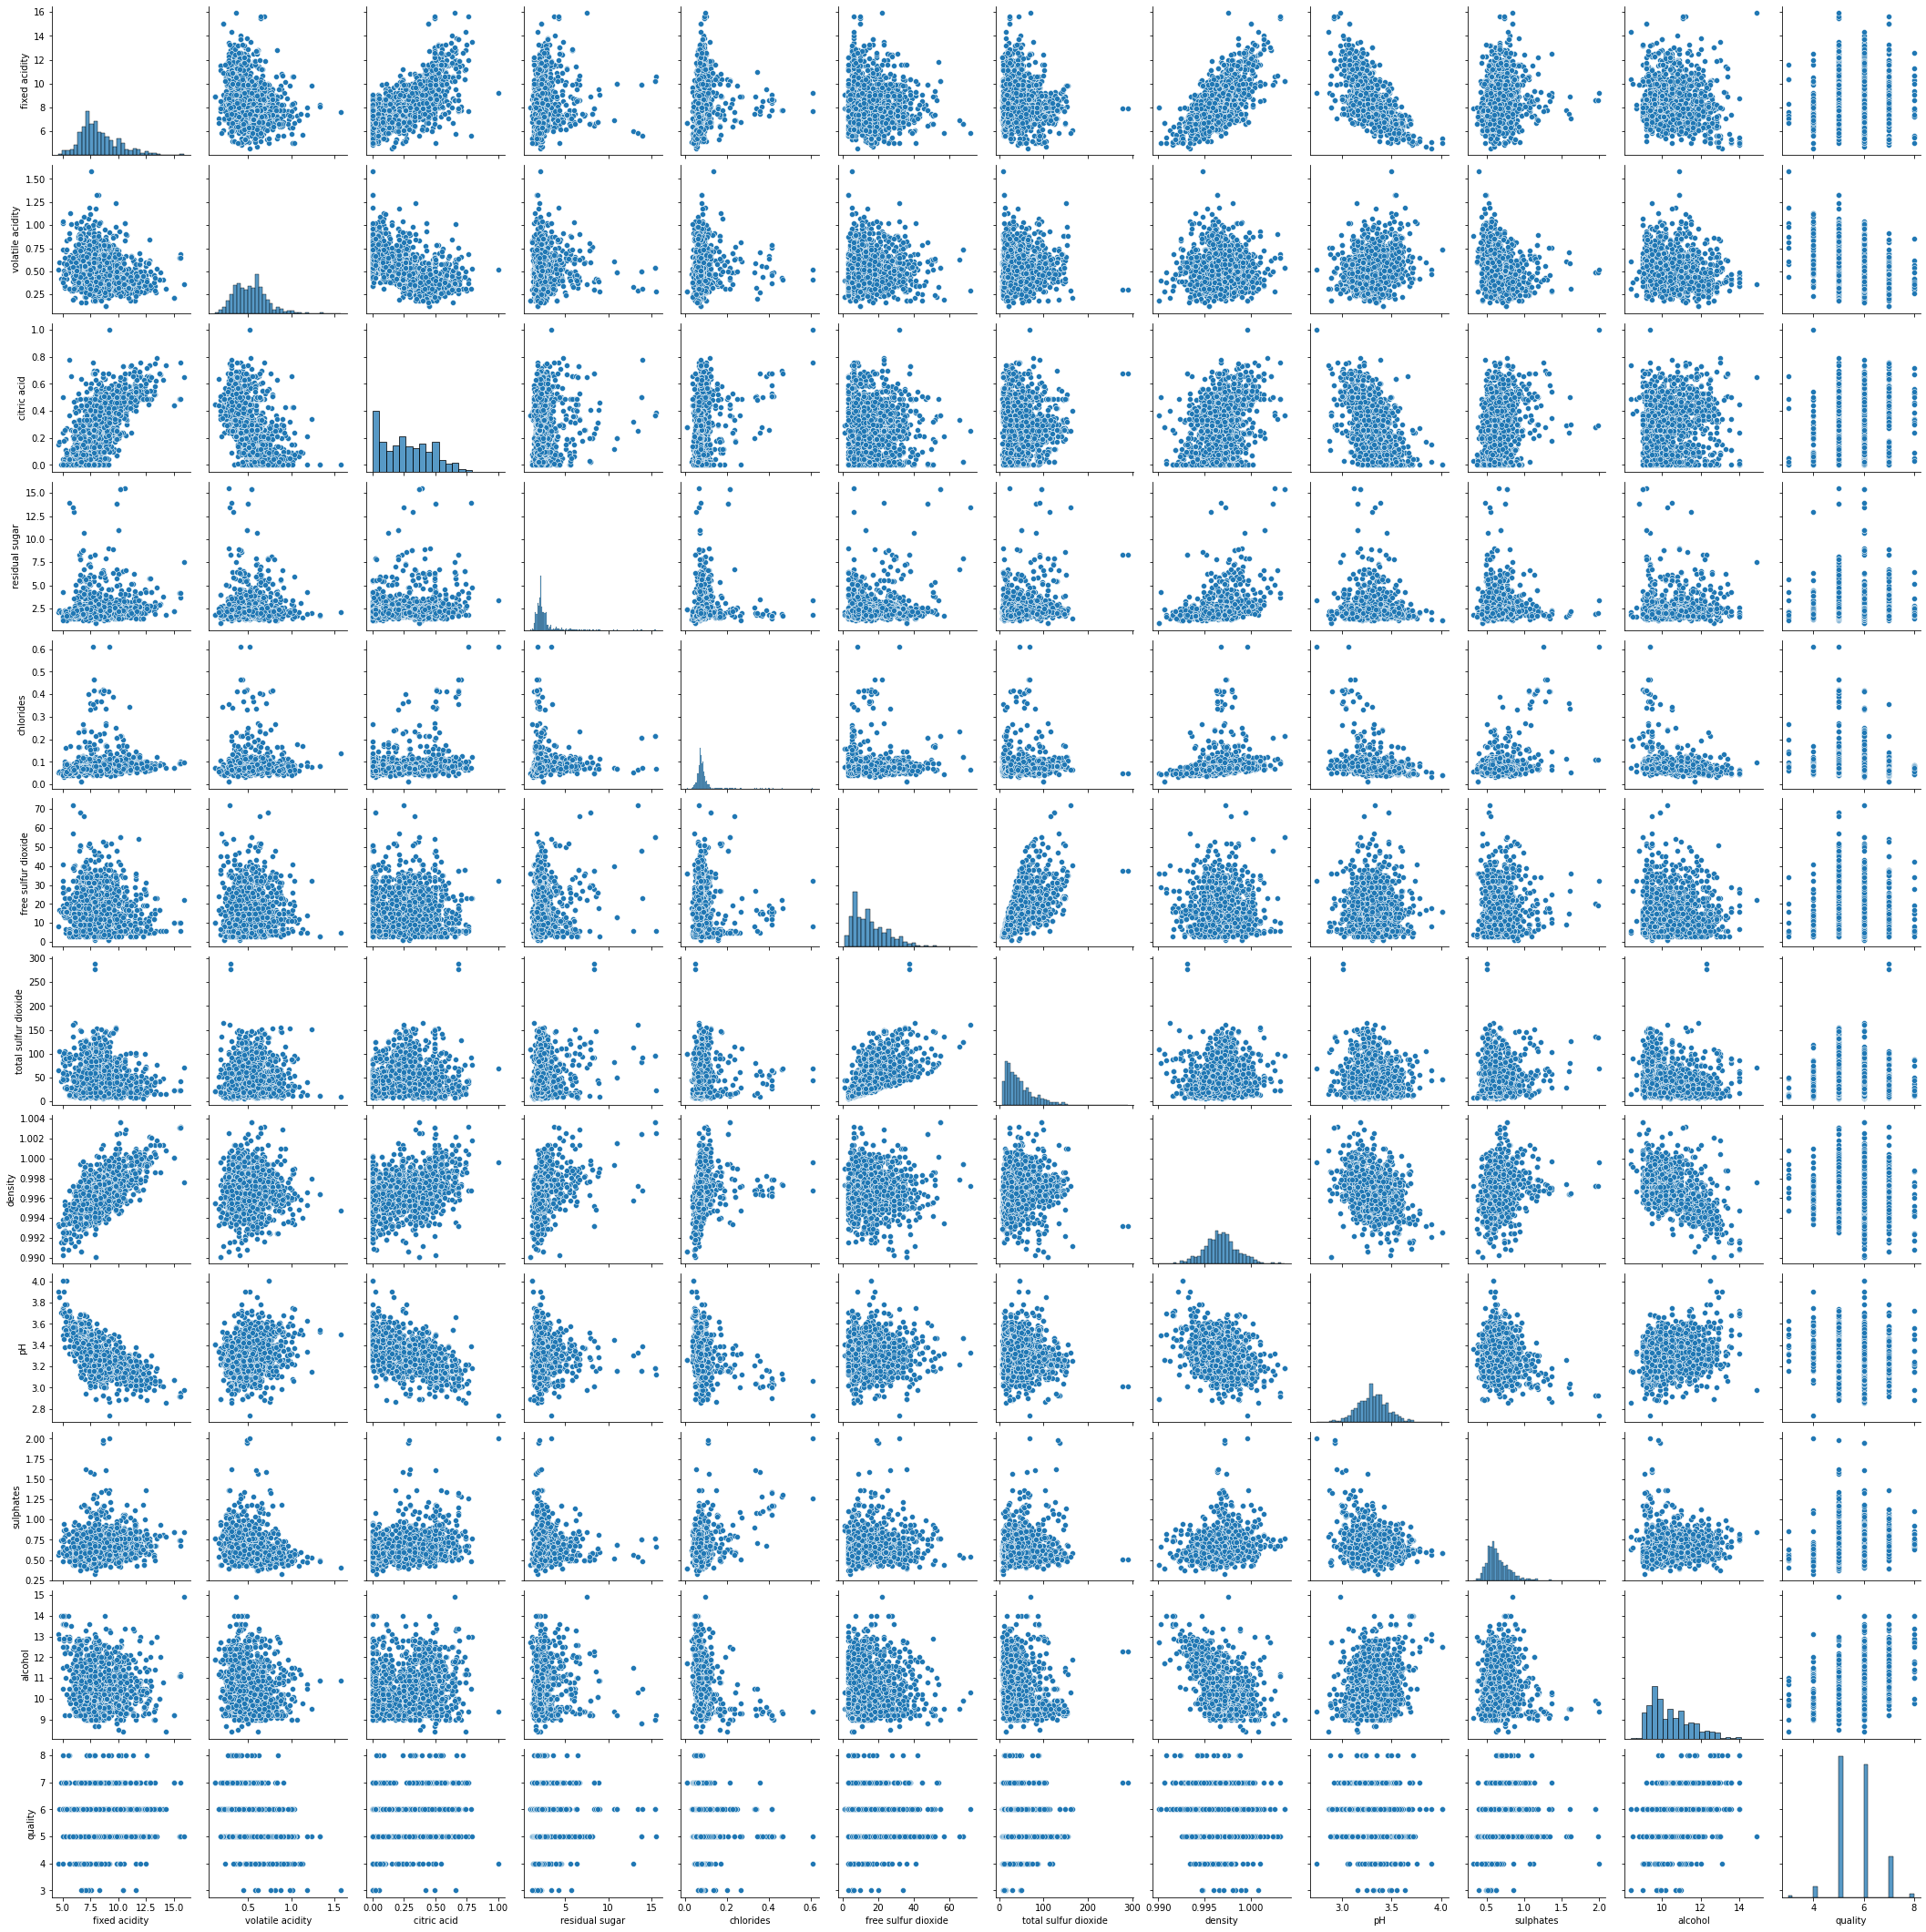

In [23]:
#Building a pairplot
sns.pairplot(red_wine_data)

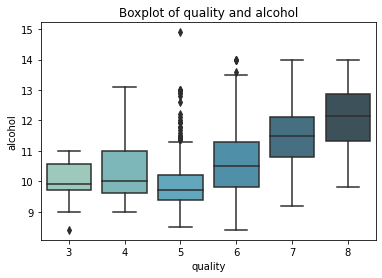

In [24]:
#building the boxplot
sns.boxplot(y, red_wine_data['alcohol'],palette='GnBu_d')
plt.title("Boxplot of quality and alcohol")
plt.show()

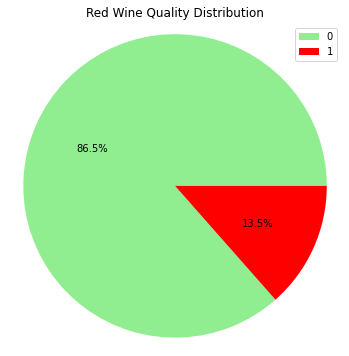

The amount of good quality red wine is  13.5 %.
Mean red wine quality =  5.635279347143754


In [26]:
#Grouping the wine based on grade
#Defining 'grade' of wine

#Good wine
red_wine_data['grade'] = 1

#Bad wine
red_wine_data.grade[red_wine_data.quality < 6.5] = 0

#sns.set(style="whitegrid")
#p = sns.countplot(data=red_wine_data, x='grade', palette='muted")

#Set plotsize and colour
plt.figure(figsize=(6,6))
colors = ['lightgreen','red']

labels = red_wine_data.grade.value_counts().index
plt.pie(red_wine_data.grade.value_counts(), autopct='%1.1f%%', colors=colors)
plt.legend(labels, loc='Best')
plt.axis('equal')
plt.title("Red Wine Quality Distribution")
plt.show()

print("The amount of good quality red wine is ",round(red_wine_data.grade.value_counts(normalize=True)[1]*100,1),"%.")
print("Mean red wine quality = ",red_wine_data['quality'].mean())

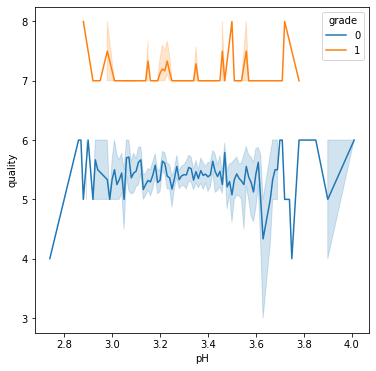

In [27]:
#Plot to see hoe pH varies with the grade of red_wine
plt.figure(figsize=(6,6))
ax = sns.lineplot(x="pH",y='quality', hue='grade', data=red_wine_data, markers=True)

In [28]:
red_wine_data['grade'].value_counts()

0    1378
1     215
Name: grade, dtype: int64

**Now, we predict red wine quality using :**

1.Random Forest Classifier

2.Gaussian Naive Bayes Classifier

3.Decision Tree Classifier

4.KNeighbours Classifier

5.SVM Classsifier

In [29]:
#Checking once more for column names
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'grade'],
      dtype='object')

In [31]:
#Defining x and y
x = red_wine_data.drop(['quality'], axis = 1)
y = red_wine_data['quality']

In [38]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

1. Using Random Forest Classifier

In [43]:
#Load Random forest classifier
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

#Train the classifier/Fitting the model
clf.fit(x_train, y_train)

#Predict the  response
y_pred = clf.predict(x_test)
acc_rf = round(clf.score(x_test, y_test)*100, 2)

#Calculating the accuracy
from sklearn import metrics

print("Random Forest Classifier Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")

Random Forest Classifier Accuracy :  74.92163009404389 %


2. Using Gaussian Naive Bayes Classifier

In [44]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the Classifier
gnb.fit(x_train, y_train)

#Predict the  response
y_pred = gnb.predict(x_test)
acc_gnb = round(clf.score(x_test, y_test)*100, 2)

#Calculating the accuracy
from sklearn import metrics

print("Gaussian Naive Bayes Classifier Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")

Gaussian Naive Bayes Classifier Accuracy :  71.15987460815047 %


3. Using Decision Tree

In [45]:
#Load Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#Create a Decision tree classifier 
clf = DecisionTreeClassifier(max_depth=10)

#Train the classifier/Fitting the model
clf = clf.fit(x_train, y_train)

#Predict the  response
y_pred = clf.predict(x_test)
acc_dt = round(clf.score(x_test, y_test)*100, 2)

#Calculating the accuracy
from sklearn.metrics import accuracy_score

print("Decision Tree Classifier Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")

Decision Tree Classifier Accuracy :  68.96551724137932 %


4. Using K-Nearest Neighbours**(KNN)**

In [46]:
import sys, os

#Import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

#Instantiate the learning model k=3
knn = KNeighborsClassifier(n_neighbors=3)

#Fitting the model
knn.fit(x_train, y_train)

#Predict the  response
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test)*100, 2)

#Calculating the accuracy
from sklearn.metrics import accuracy_score

print("K-Nearest Neighbors Classifier Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")

K-Nearest Neighbors Classifier Accuracy :  52.03761755485894 %


5. Using SVM

In [48]:
import sys, os

#Import SVM model
from sklearn import svm
from sklearn.svm import SVC

#Create the SVM Classifier
clf = SVC(C=1, kernel='rbf')

#Fitting the model
clf.fit(x_train, y_train)

#Predict the  response
y_pred = clf.predict(x_test)
acc_svm = round(clf.score(x_test, y_test)*100, 2)

#Calculating the accuracy
from sklearn.metrics import accuracy_score

print("Support Vector Machine Model Accuracy : ",metrics.accuracy_score(y_test, y_pred)*100,"%")

Support Vector Machine Model Accuracy :  49.843260188087775 %


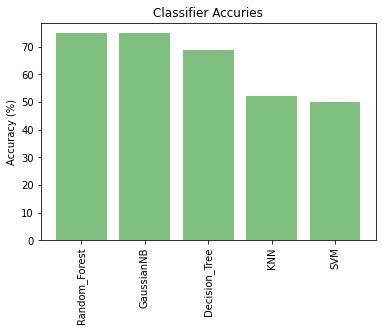

In [52]:
#Visualizing all the accuracies
predictors_group = ("Random_Forest", "GaussianNB", "Decision_Tree", "KNN", "SVM")
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_rf, acc_gnb, acc_dt, acc_knn, acc_svm]

plt.bar(x_pos,accuracies1, align='center', alpha=0.5, color="green")
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel("Accuracy (%)")
plt.title("Classifier Accuries")
plt.show()

Reducing overfitting using Cross Validation for top three algorithms i.e. RF, DT, GNB

In [53]:
#Importing the mo0del for Prediction

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Creating a list of tuple with model and its name
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GNB', GaussianNB()))

In [55]:
#Import Cross Validation
from sklearn.model_selection import cross_val_score

#Simulate splitting a dataset of 1000 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(x)

acc = []#All algorithms accuracies
names = []#All model names

for name, model in models :
  acc_of_model = cross_val_score(model, x_train,y_train, cv=kf, scoring='accuracy')#KFold=5 without shuffling
  acc.append(acc_of_model)#Appending accuracies of different model to acc list

  names.append(acc_of_model)#Appending names of model
  Acc = name, round(acc_of_model.mean()*100,2)
  print(Acc)

('DT', 69.94)
('RF', 77.32)
('GNB', 66.56)


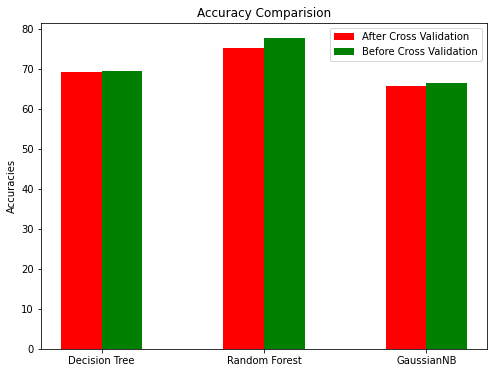

In [60]:
#Plotting all accuracies togrther for comparision
labels = ["Decision Tree","Random Forest","GaussianNB"]

NoCV =[69.49, 77.65, 66.43]#accuracy before cross validation
CV = [69.24, 75.14, 65.80]#accuracy after cross validation

X = np.arange(len(labels))#the label location
width = 0.25 #The width of the bars

f,ax = plt.subplots(figsize=(8,6))
p1 = ax.bar(X - width/2, CV, width, label='After Cross Validation', color = 'r')
p2 = ax.bar(X + width/2, NoCV, width, label='Before Cross Validation', color = 'g')

ax.set_ylabel('Accuracies')
ax.set_title('Accuracy Comparision')
ax.set_xticks(X)
plt.xticks()
ax.set_xticklabels(labels)
ax.legend(loc='top right')
plt.show()

From the bar graph, we can see that **Random Forest provides best accuracy** followed by decision tree and then GaussianNB. Using this resuklt, we can say that, **Random Forest and Decision Tree can be applied to this dataset.**